# Download Data

In [511]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
import re
import scipy.stats as stats

In [512]:
data = pd.read_excel('C:/Users/ADMIN/OneDrive - Trường ĐH CNTT - University of Information Technology/Tài liệu/Tài liệu học tập/DS105/Final_project/Data/Giá-căn-hộ-chung-cư-TP.HCM.xlsx')

In [513]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9552 entries, 0 to 9551
Data columns (total 35 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   ad_list_id                               9552 non-null   int64  
 1   ad_date                                  9552 non-null   object 
 2   ad_account_id                            9552 non-null   int64  
 3   ad_projectid                             7956 non-null   float64
 4   ad_project_oid                           7956 non-null   float64
 5   ad_account_oid                           9552 non-null   object 
 6   ad_account_name                          9552 non-null   object 
 7   ad_subject                               9552 non-null   object 
 8   ad_company_ad                            9552 non-null   bool   
 9   ad_price                                 9550 non-null   float64
 10  ad_videos                                9552 no

In [514]:
data.head(5)

,ad_list_id,ad_date,ad_account_id,ad_projectid,ad_project_oid,ad_account_oid,ad_account_name,ad_subject,ad_company_ad,ad_price,...,ad_street_name,ad_params_apartment_feature_value,ad_params_apartment_type_value,ad_params_balconydirection_value,ad_params_direction_value,ad_params_property_status_value,ad_toilets,ad_street_number,ad_params_property_legal_document_value,ad_params_furnishing_sell_value
0,111594002,3 ngày trước,185996,483.0,7.748963e+08,9c309c763080578d580f8bf873f1b3d4,PHÚC,CHÍNH CHỦ BÁN GẤP CH RICHMOND 3PN FULL NT,True,4.400000e+09,...,Nguyễn Xí,NaN,Chung cư,NaN,NaN,Đã bàn giao,NaN,Số 207,NaN,NaN
1,110628268,1 tháng trước,19358233,4766.0,1.887962e+09,925cbbd202c8e5a66a264961218f0dd9,Nguyễn Thị Bích Nhâm,"Căn 2PN 79m2 Tháp Aster View Sông, Lanmark 81....",False,4.000000e+08,...,6,NaN,Chung cư,Đông Nam,NaN,Chưa bàn giao,2.0,NaN,NaN,NaN
2,111635246,18 giờ trước,15933983,1.0,9.876302e+08,56d3bdf5cce68a99e8e1438353aa9c87,Thế vinh Trần,𝗖𝗔̆𝗡 𝗛𝗢̣̂ 𝗤𝗨𝗔̣̂𝗡 𝟳 𝗚𝗜𝗔́ 𝗖𝗛𝗜̉ 𝟵𝟬𝟬 𝘁𝗿𝗶𝗲̣̂𝘂 (𝟭𝟬𝟬%...,True,9.000000e+08,...,Trần Xuân Soạn,NaN,"Căn hộ dịch vụ, mini",NaN,NaN,Chưa bàn giao,1.0,793,Đang chờ sổ,Nội thất đầy đủ
3,111458807,7 ngày trước,14391934,1.0,9.876302e+08,cd6bfee9b2754ab1cdbdd495c048256f,Ngọc Yến,căn hô giá rẻ,True,6.800000e+08,...,Hẻm 117 Hồ Văn Long,NaN,Chung cư,Tây Bắc,Đông Nam,Chưa bàn giao,1.0,NaN,NaN,NaN
4,110981908,7 ngày trước,25566606,NaN,NaN,247719ac249f6c61890ae698f60d591b,NGUYỄN NAM LONG,"bán căn hộ the Privia bình tân,tphcm",False,6.000000e+08,...,Đường An Dương Vương,NaN,"Căn hộ dịch vụ, mini",NaN,NaN,Chưa bàn giao,2.0,NaN,Đã có sổ,NaN


In [515]:
drop_cols = ['ad_list_id', 'ad_company_ad' ,'ad_date', 'ad_account_id', 'ad_projectid' ,'ad_project_oid','ad_account_oid', 'ad_account_name', \
             'ad_subject', 'ad_videos', 'ad_images', 'ad_avatar', 'ad_reviewer_nickname', 'ad_block', 'ad_street_number',\
             'ad_protection_entitlement', 'ad_street_name','ad_ward_name', 'ad_contain_videos', 'ad_number_of_images']

In [516]:
data.drop(drop_cols, axis = 1, inplace = True)

In [517]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9552 entries, 0 to 9551
Data columns (total 15 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   ad_price                                 9550 non-null   float64
 1   ad_rooms                                 9552 non-null   int64  
 2   ad_size                                  9552 non-null   float64
 3   ad_floornumber                           2250 non-null   float64
 4   ad_longitude                             9547 non-null   float64
 5   ad_latitude                              9547 non-null   float64
 6   ad_detail_address                        6390 non-null   object 
 7   ad_params_apartment_feature_value        1470 non-null   object 
 8   ad_params_apartment_type_value           9552 non-null   object 
 9   ad_params_balconydirection_value         2336 non-null   object 
 10  ad_params_direction_value                2066 no

In [518]:
data.isna().sum()

ad_price                                      2
ad_rooms                                      0
ad_size                                       0
ad_floornumber                             7302
ad_longitude                                  5
ad_latitude                                   5
ad_detail_address                          3162
ad_params_apartment_feature_value          8082
ad_params_apartment_type_value                0
ad_params_balconydirection_value           7216
ad_params_direction_value                  7486
ad_params_property_status_value               0
ad_toilets                                 1385
ad_params_property_legal_document_value    4394
ad_params_furnishing_sell_value            4668
dtype: int64

# Data PreProcessing

## NA Values:

In [519]:
data['ad_params_apartment_feature_value'].value_counts()    

Căn góc    1470
Name: ad_params_apartment_feature_value, dtype: int64

In [520]:
data['ad_params_apartment_feature_value'].fillna('Căn thường', inplace = True)
data['ad_params_apartment_feature_value'].value_counts()

Căn thường    8082
Căn góc       1470
Name: ad_params_apartment_feature_value, dtype: int64

In [521]:
data['ad_floornumber'].fillna(method = 'ffill', inplace = True)

In [522]:
data['ad_detail_address'].fillna(data['ad_detail_address'].mode()[0], inplace = True)

In [523]:
data['ad_params_balconydirection_value'].fillna(method = 'ffill', inplace = True)
data['ad_params_balconydirection_value'].value_counts()

Đông Nam    2724
Đông        1303
Đông Bắc    1179
Tây Bắc     1114
Nam         1046
Tây Nam      899
Bắc          730
Tây          556
Name: ad_params_balconydirection_value, dtype: int64

In [524]:
data['ad_params_direction_value'].fillna(method = 'ffill', inplace = True)
data['ad_params_direction_value'].value_counts()

Tây Bắc     1793
Đông Nam    1782
Tây         1111
Đông Bắc    1064
Nam         1029
Tây Nam      982
Bắc          921
Đông         867
Name: ad_params_direction_value, dtype: int64

In [525]:
data['ad_toilets'].fillna(method = 'ffill', inplace = True)
data['ad_toilets'].fillna(data['ad_toilets'].mode()[0], inplace = True)

In [526]:
data['ad_params_property_legal_document_value'].fillna(method = 'ffill', inplace = True)

In [527]:
data['ad_params_furnishing_sell_value'].fillna(method='ffill', inplace = True)

In [528]:
data.isna().sum()

ad_price                                   2
ad_rooms                                   0
ad_size                                    0
ad_floornumber                             1
ad_longitude                               5
ad_latitude                                5
ad_detail_address                          0
ad_params_apartment_feature_value          0
ad_params_apartment_type_value             0
ad_params_balconydirection_value           1
ad_params_direction_value                  3
ad_params_property_status_value            0
ad_toilets                                 0
ad_params_property_legal_document_value    2
ad_params_furnishing_sell_value            2
dtype: int64

In [529]:
data.dropna(inplace = True)

In [530]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9544 entries, 3 to 9551
Data columns (total 15 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   ad_price                                 9544 non-null   float64
 1   ad_rooms                                 9544 non-null   int64  
 2   ad_size                                  9544 non-null   float64
 3   ad_floornumber                           9544 non-null   float64
 4   ad_longitude                             9544 non-null   float64
 5   ad_latitude                              9544 non-null   float64
 6   ad_detail_address                        9544 non-null   object 
 7   ad_params_apartment_feature_value        9544 non-null   object 
 8   ad_params_apartment_type_value           9544 non-null   object 
 9   ad_params_balconydirection_value         9544 non-null   object 
 10  ad_params_direction_value                9544 no

In [531]:
data['ad_detail_address'].nunique()

590

In [532]:
data.tail(5)

,ad_price,ad_rooms,ad_size,ad_floornumber,ad_longitude,ad_latitude,ad_detail_address,ad_params_apartment_feature_value,ad_params_apartment_type_value,ad_params_balconydirection_value,ad_params_direction_value,ad_params_property_status_value,ad_toilets,ad_params_property_legal_document_value,ad_params_furnishing_sell_value
9547,1.210000e+09,2,1.0,10.0,106.63994,10.79413,"số 88 Số 88 đường N1, phường Sơn Kỳ, quận Tân ...",Căn thường,Chung cư,Đông Bắc,Tây Nam,Đã bàn giao,2.0,Đã có sổ,Nội thất đầy đủ
9548,6.390000e+09,2,66.0,10.0,106.72032,10.79387,"số 88 Số 88 đường N1, phường Sơn Kỳ, quận Tân ...",Căn thường,Chung cư,Đông Bắc,Tây Nam,Đã bàn giao,2.0,Đang chờ sổ,Nhà trống
9549,2.700000e+09,2,65.0,10.0,106.70185,10.81549,"số 88 Số 88 đường N1, phường Sơn Kỳ, quận Tân ...",Căn thường,Chung cư,Đông Bắc,Tây Nam,Đã bàn giao,2.0,Đang chờ sổ,Nhà trống
9550,3.970000e+09,3,104.0,10.0,106.61603,10.80384,"số 88 Số 88 đường N1, phường Sơn Kỳ, quận Tân ...",Căn thường,Chung cư,Đông Bắc,Tây Nam,Đã bàn giao,2.0,Đang chờ sổ,Nhà trống
9551,1.900000e+09,2,63.0,10.0,106.58320,10.79995,"Lô 5 Khu dân cư Vĩnh Lộc, Phường Bình Hưng Hòa...",Căn thường,Chung cư,Đông Bắc,Tây Nam,Đã bàn giao,2.0,Đang chờ sổ,Nhà trống


In [533]:
def tach_phuong_quan(dia_chi):
    match = re.search(r'quận\s+([^,]+)', dia_chi, re.IGNORECASE)
    if match:
        quan = match.group(1).strip()
        return 'Quận ' + quan
    else:
        return None

In [534]:
data['ad_ward_name'] = data['ad_detail_address'].apply(lambda x: pd.Series(tach_phuong_quan(x)))

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_8244\1010556108.py:1: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  data['ad_ward_name'] = data['ad_detail_address'].apply(lambda x: pd.Series(tach_phuong_quan(x)))
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_8244\1010556108.py:1: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  data['ad_ward_name'] = data['ad_detail_address'].apply(lambda x: pd.Series(tach_phuong_quan(x)))
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_8244\1010556108.py:1: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  data['ad_ward_name'] = data['ad_detail_address'].apply(lambda x: pd.Series(tach_phuong_quan(x)))
C:\Users\ADMIN\AppData

In [535]:
data['ad_ward_name'].value_counts()

Quận Tân Phú                  3705
Quận 2                         502
Quận 7                         464
Quận Bình Tân                  352
Quận 8                         299
Quận 9                         248
Quận 12                        171
Quận 6                         153
Quận Bình Thạnh                142
Quận Thủ Đức                   122
Quận 10                        118
Quận 4                          87
Quận Tân Bình                   76
Quận 5                          67
Quận 3                          45
Quận 1                          34
Quận Gò Vấp                     17
Quận 11                         13
Quận Phú Nhuận                  11
Quận 9 cũ)                       3
Quận Tân Phú.                    2
Quận 2 - Thành phố Thủ Đức       1
Name: ad_ward_name, dtype: int64

In [536]:
data.drop('ad_detail_address', axis = 1, inplace = True)

In [537]:
data.head(5)

,ad_price,ad_rooms,ad_size,ad_floornumber,ad_longitude,ad_latitude,ad_params_apartment_feature_value,ad_params_apartment_type_value,ad_params_balconydirection_value,ad_params_direction_value,ad_params_property_status_value,ad_toilets,ad_params_property_legal_document_value,ad_params_furnishing_sell_value,ad_ward_name
3,6.800000e+08,1,38.2,2.0,106.58905,10.761095,Căn thường,Chung cư,Tây Bắc,Đông Nam,Chưa bàn giao,1.0,Đang chờ sổ,Nội thất đầy đủ,Quận Tân Phú
4,6.000000e+08,2,36.0,2.0,106.62432,10.755127,Căn thường,"Căn hộ dịch vụ, mini",Tây Bắc,Đông Nam,Chưa bàn giao,2.0,Đã có sổ,Nội thất đầy đủ,Quận Tân Phú
5,3.100000e+09,2,61.0,2.0,106.66579,10.759090,Căn góc,Chung cư,Tây Bắc,Đông Nam,Đã bàn giao,1.0,Đã có sổ,Nội thất đầy đủ,Quận 5
6,2.300000e+09,2,60.0,2.0,106.62294,10.788987,Căn thường,Chung cư,Tây Bắc,Đông Nam,Đã bàn giao,2.0,Đã có sổ,Nội thất đầy đủ,Quận Tân Phú
7,1.380000e+09,2,64.0,2.0,106.66851,10.813230,Căn thường,Chung cư,Đông Bắc,Tây Nam,Đã bàn giao,1.0,Đã có sổ,Nội thất đầy đủ,Quận Tân Bình


In [538]:
data['ad_ward_name'].isna().sum()

2912

In [539]:
data['ad_ward_name'].fillna(method = 'ffill', inplace = True)

In [540]:
data['ad_ward_name'].value_counts()

Quận Tân Phú                  5359
Quận 2                         694
Quận 7                         644
Quận Bình Tân                  501
Quận 8                         441
Quận 9                         374
Quận 12                        252
Quận 6                         207
Quận Bình Thạnh                194
Quận 10                        188
Quận Thủ Đức                   175
Quận 4                         133
Quận Tân Bình                  102
Quận 5                          95
Quận 3                          68
Quận 1                          49
Quận Gò Vấp                     22
Quận 11                         18
Quận Phú Nhuận                  17
Quận 9 cũ)                       6
Quận Tân Phú.                    3
Quận 2 - Thành phố Thủ Đức       2
Name: ad_ward_name, dtype: int64

In [541]:
data['ad_ward_name'].unique()

array(['Quận Tân Phú', 'Quận 5', 'Quận Tân Bình', 'Quận Bình Tân',
       'Quận Gò Vấp', 'Quận Bình Thạnh', 'Quận 7', 'Quận 2', 'Quận 4',
       'Quận 9', 'Quận 12', 'Quận 10', 'Quận Thủ Đức', 'Quận 8', 'Quận 6',
       'Quận 3', 'Quận 1', 'Quận 11', 'Quận 9 cũ)', 'Quận Phú Nhuận',
       'Quận Tân Phú.', 'Quận 2 - Thành phố Thủ Đức'], dtype=object)

In [542]:
data['ad_ward_name'].replace('Quận 9 cũ)', 'Quận 9', inplace = True)

In [543]:
data['ad_params_property_legal_document_value'].unique()

array(['Đang chờ sổ', 'Đã có sổ', 'Giấy tờ khác'], dtype=object)

In [544]:
data['ad_params_furnishing_sell_value'].unique()

array(['Nội thất đầy đủ', 'Nhà trống', 'Nội thất cao cấp', 'Bàn giao thô'],
      dtype=object)

In [545]:
data['ad_params_apartment_feature_value'].unique()

array(['Căn thường', 'Căn góc'], dtype=object)

In [546]:
data['ad_params_apartment_type_value'].unique()

array(['Chung cư', 'Căn hộ dịch vụ, mini', 'Duplex', 'Penthouse',
       'Officetel', 'Tập thể, cư xá'], dtype=object)

In [547]:
data['ad_params_balconydirection_value'].unique()

array(['Tây Bắc', 'Đông Bắc', 'Tây Nam', 'Đông', 'Nam', 'Tây', 'Đông Nam',
       'Bắc'], dtype=object)

In [548]:
data['ad_params_direction_value'].unique()

array(['Đông Nam', 'Tây Nam', 'Nam', 'Bắc', 'Đông', 'Tây', 'Tây Bắc',
       'Đông Bắc'], dtype=object)

In [549]:
data['ad_params_property_legal_document_value'].unique()

array(['Đang chờ sổ', 'Đã có sổ', 'Giấy tờ khác'], dtype=object)

In [550]:
# data['ad_company_ad'] = data['ad_company_ad'].astype(object)
data['ad_price'] = data['ad_price'].astype(float)
data['ad_rooms'] = data['ad_rooms'].astype(object)
data['ad_size'] = data['ad_size'].astype(float)
data['ad_floornumber'] = data['ad_floornumber'].astype(int)
data['ad_longitude'] = data['ad_longitude'].astype(float)
data['ad_latitude'] = data['ad_latitude'].astype(float)
data['ad_toilets'] = data['ad_toilets'].astype(object)


In [551]:
num_cols = data.select_dtypes(exclude = 'object').columns
num_cols

Index(['ad_price', 'ad_size', 'ad_floornumber', 'ad_longitude', 'ad_latitude'], dtype='object')

In [552]:
cat_cols = data.select_dtypes(include = 'object').columns
cat_cols

Index(['ad_rooms', 'ad_params_apartment_feature_value',
       'ad_params_apartment_type_value', 'ad_params_balconydirection_value',
       'ad_params_direction_value', 'ad_params_property_status_value',
       'ad_toilets', 'ad_params_property_legal_document_value',
       'ad_params_furnishing_sell_value', 'ad_ward_name'],
      dtype='object')

## Outliers

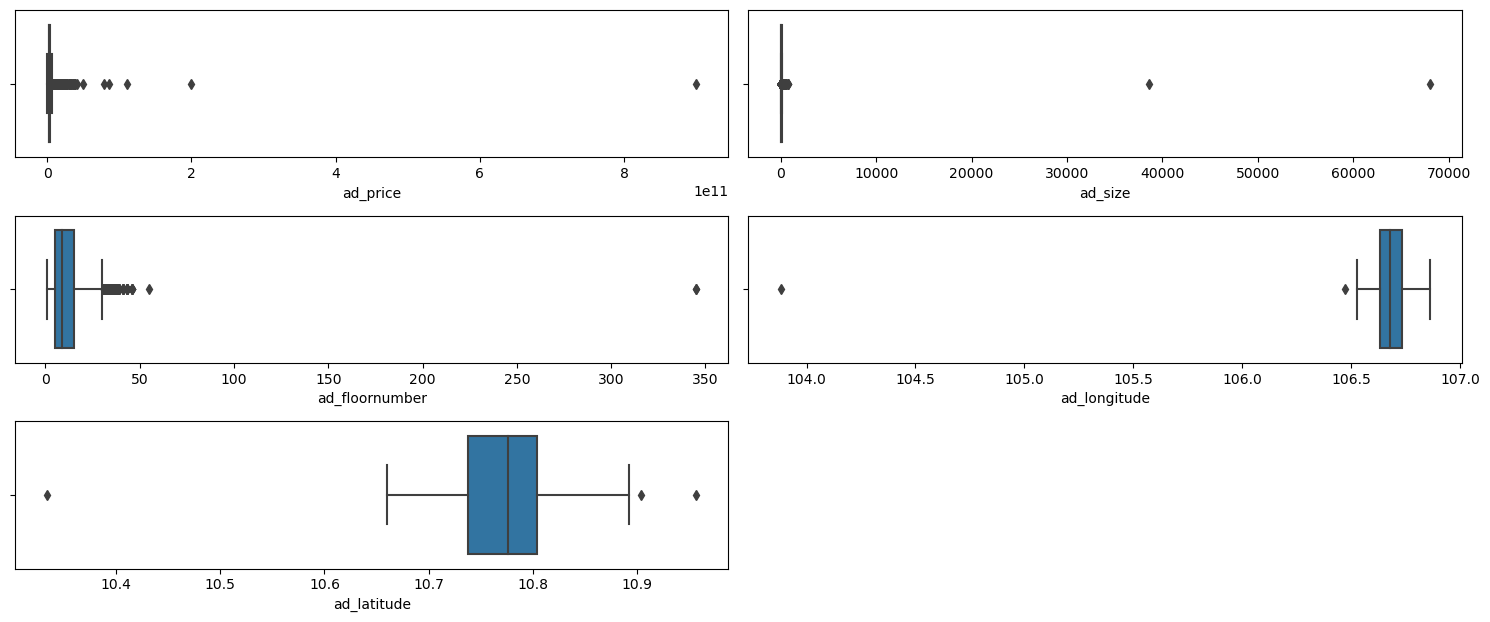

In [553]:
num_r = 5
num_c = 2

i = 0
plt.figure(figsize=(15, 10))
for col in num_cols:
    plt.subplot(num_r, num_c, i + 1)
    sns.boxplot(data = data, x = col)
    plt.tight_layout()
    i+=1

plt.show()




In [554]:
from numpy import mean
from numpy import std

In [555]:
def Outlier(data, col):
    
    
    q25, q75 = np.percentile(data[col], 25), np.percentile(data[col], 75)
    iqr = q75 - q25
        
    limit_iqr = 1.5*iqr
    lower_iqr, upper_iqr = q25 - limit_iqr, q75 + limit_iqr

    ouliers_index_iqr = [x for x in data[col] if x < lower_iqr or x > upper_iqr]
    print('Number of outliers: %d' % len(ouliers_index_iqr))

    a = []
    for x in data[col]:
        if x >= lower_iqr and x <= upper_iqr:
            a.append(x)
        else:
            a.append(None)
    return a


In [556]:
data['ad_price'] = Outlier(data, 'ad_price')

Number of outliers: 716


In [557]:
data = data[~(data['ad_price'] < 700000000)]

In [558]:
data['ad_size'] = Outlier(data, 'ad_size')

Number of outliers: 795


In [559]:
data['ad_floornumber'] = Outlier(data, 'ad_floornumber')

Number of outliers: 242


In [560]:
data['ad_latitude'] = Outlier(data, 'ad_latitude')

Number of outliers: 2


In [561]:
data['ad_longitude']= Outlier(data, 'ad_longitude')

Number of outliers: 1


In [562]:
data.dropna(axis=0, inplace=True)

In [563]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7983 entries, 5 to 9551
Data columns (total 15 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   ad_price                                 7983 non-null   float64
 1   ad_rooms                                 7983 non-null   object 
 2   ad_size                                  7983 non-null   float64
 3   ad_floornumber                           7983 non-null   float64
 4   ad_longitude                             7983 non-null   float64
 5   ad_latitude                              7983 non-null   float64
 6   ad_params_apartment_feature_value        7983 non-null   object 
 7   ad_params_apartment_type_value           7983 non-null   object 
 8   ad_params_balconydirection_value         7983 non-null   object 
 9   ad_params_direction_value                7983 non-null   object 
 10  ad_params_property_status_value          7983 no

In [564]:
data.reset_index(inplace=True)

In [565]:
data.drop('index', axis = 1 , inplace = True)

In [566]:
num_cols = data.select_dtypes(exclude = 'object').columns

In [567]:
cat_cols = data.select_dtypes(include = 'object').columns

# EDA

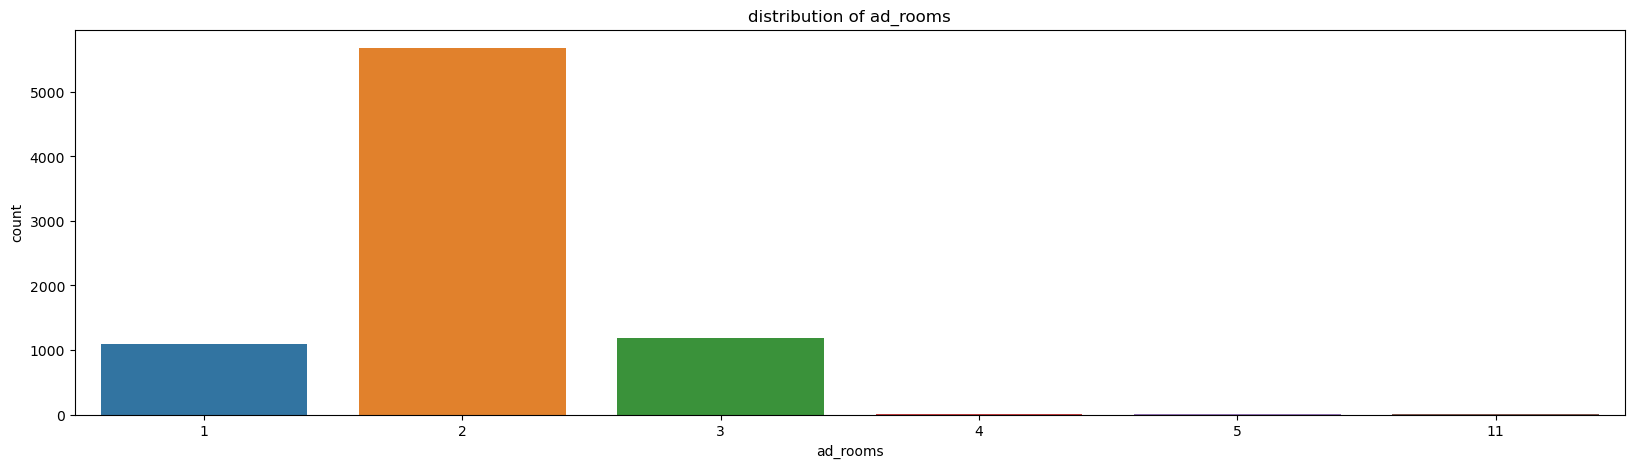

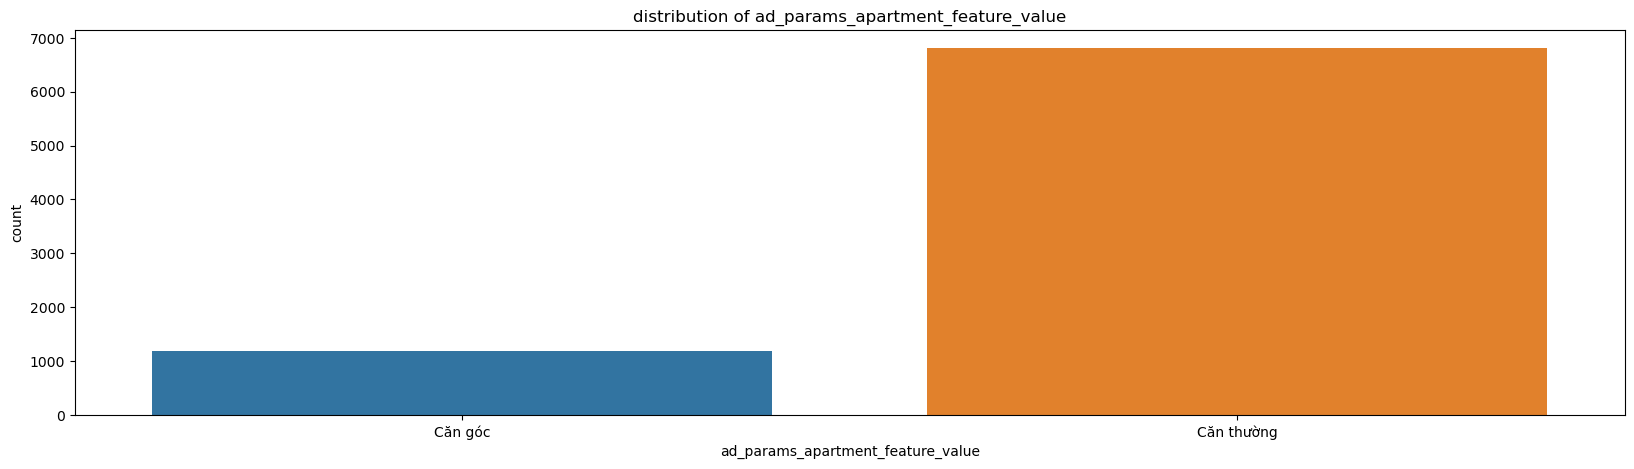

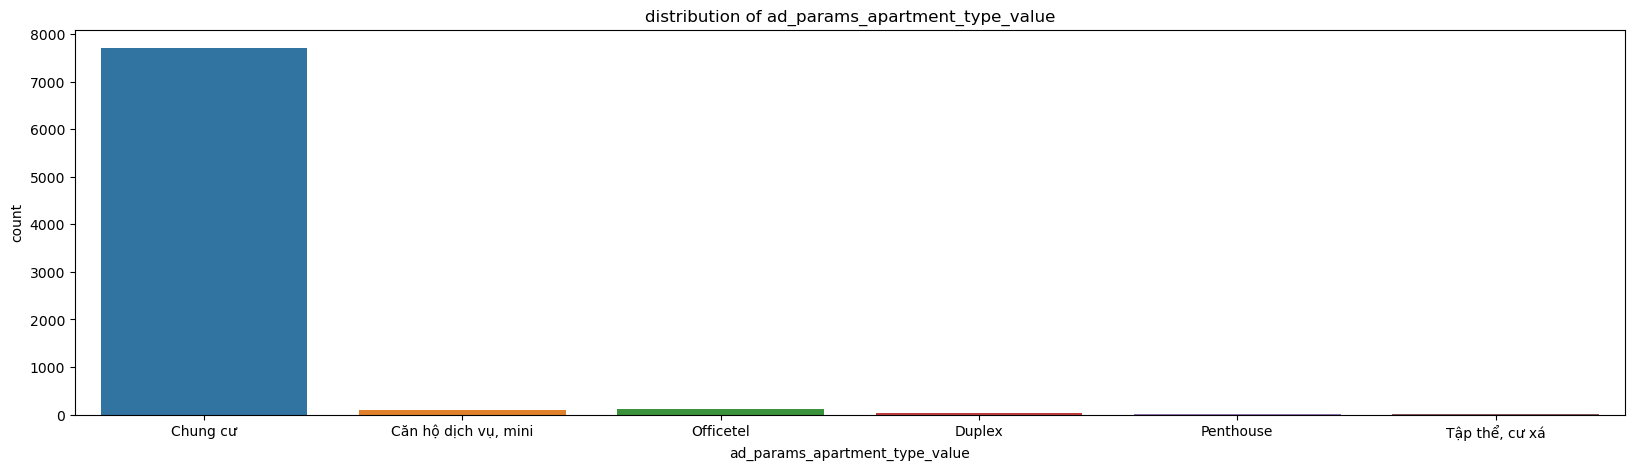

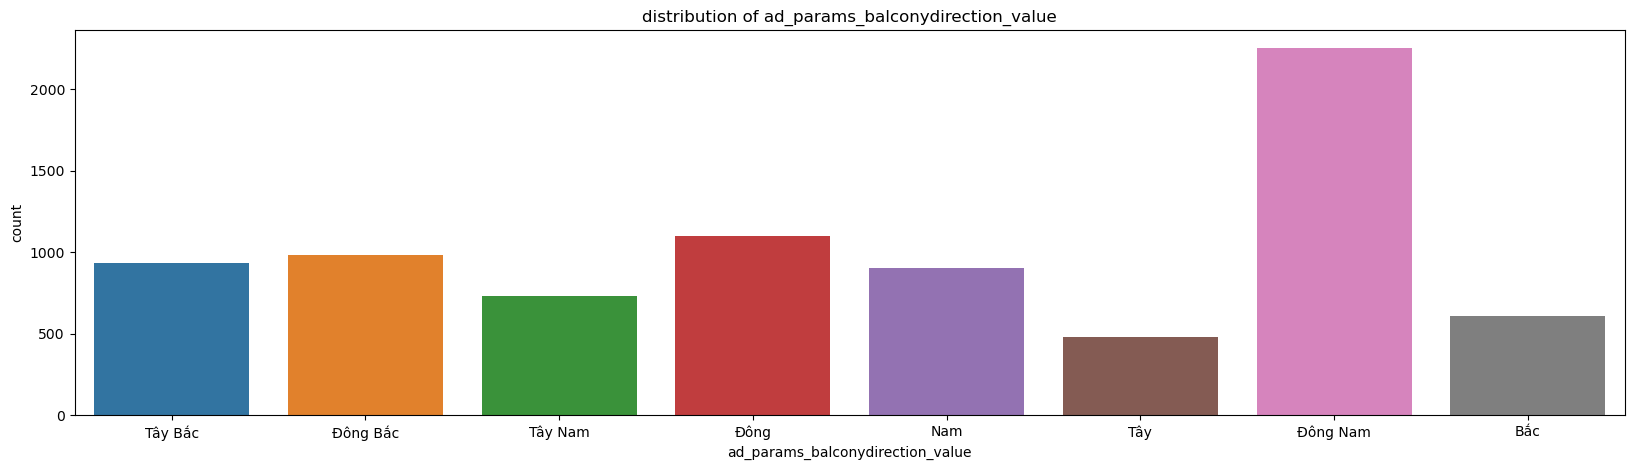

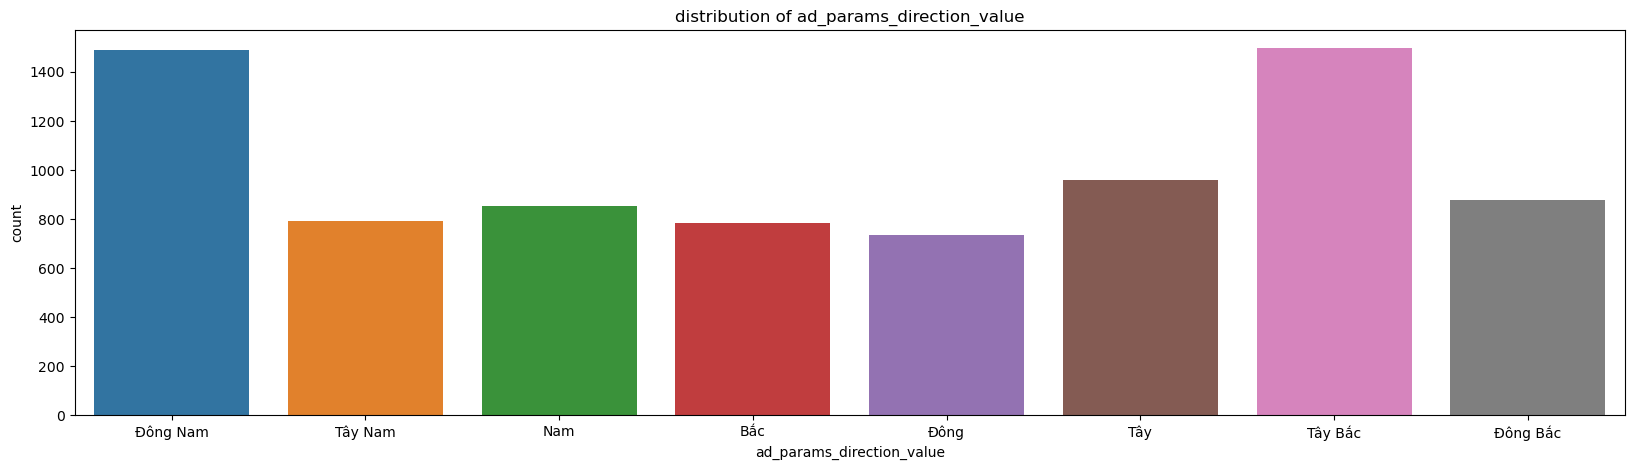

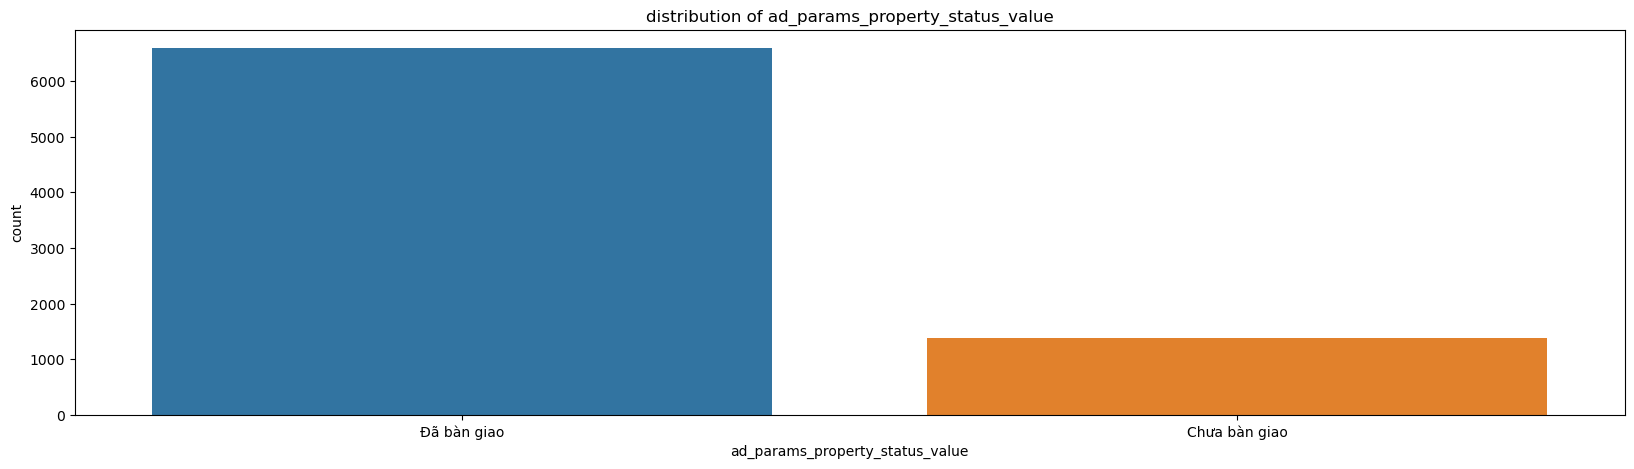

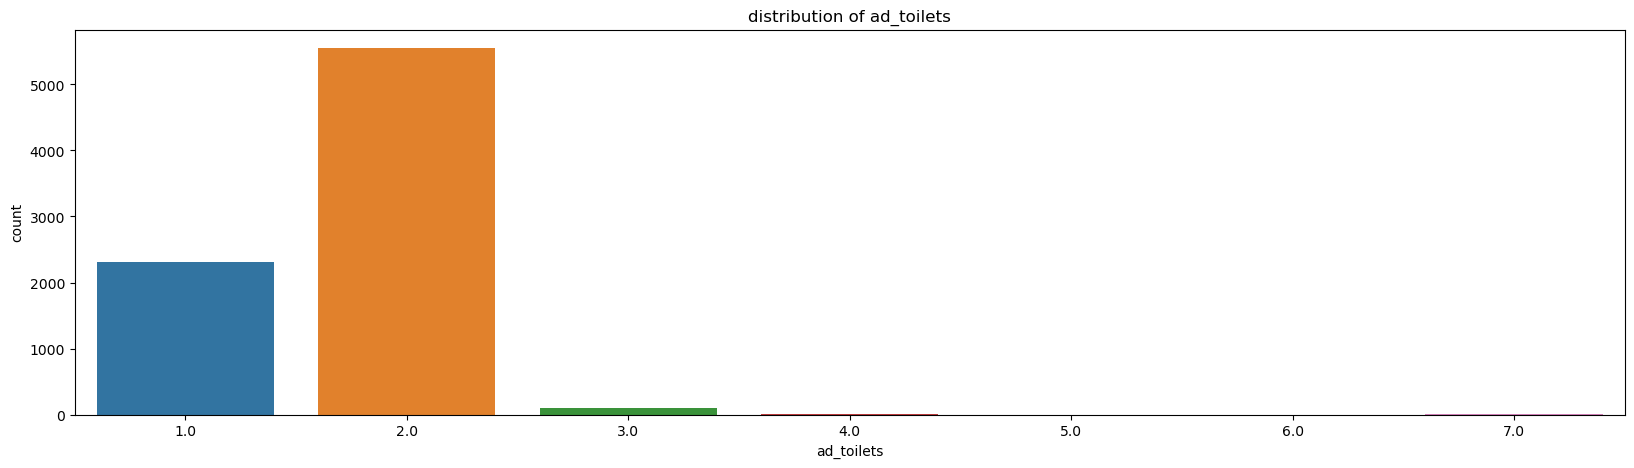

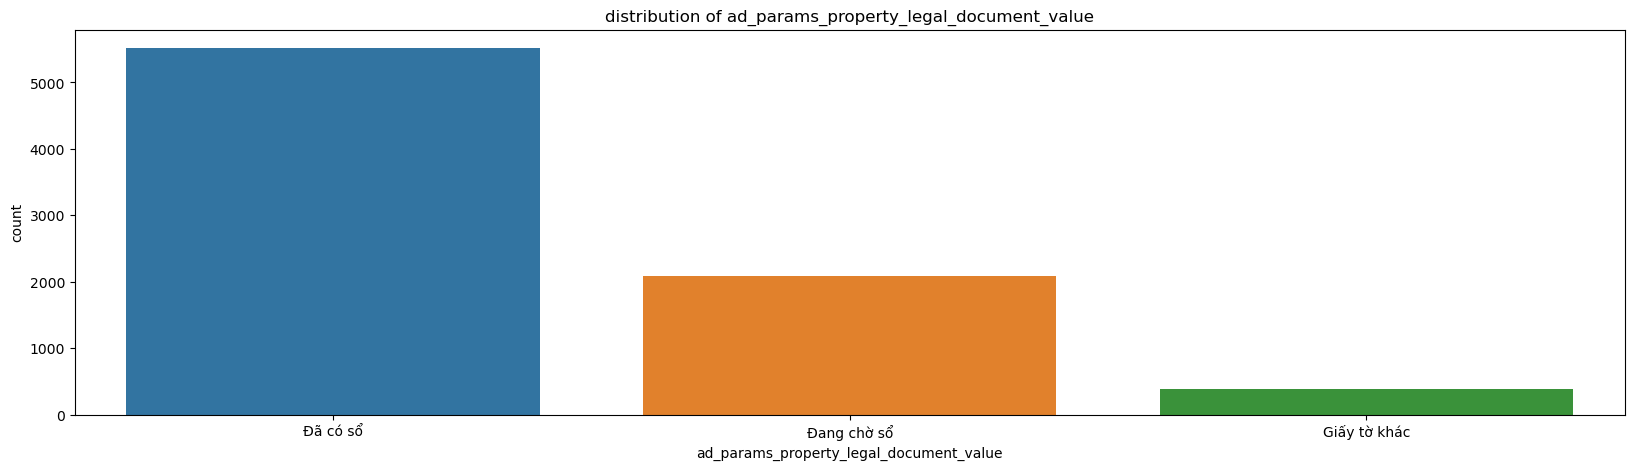

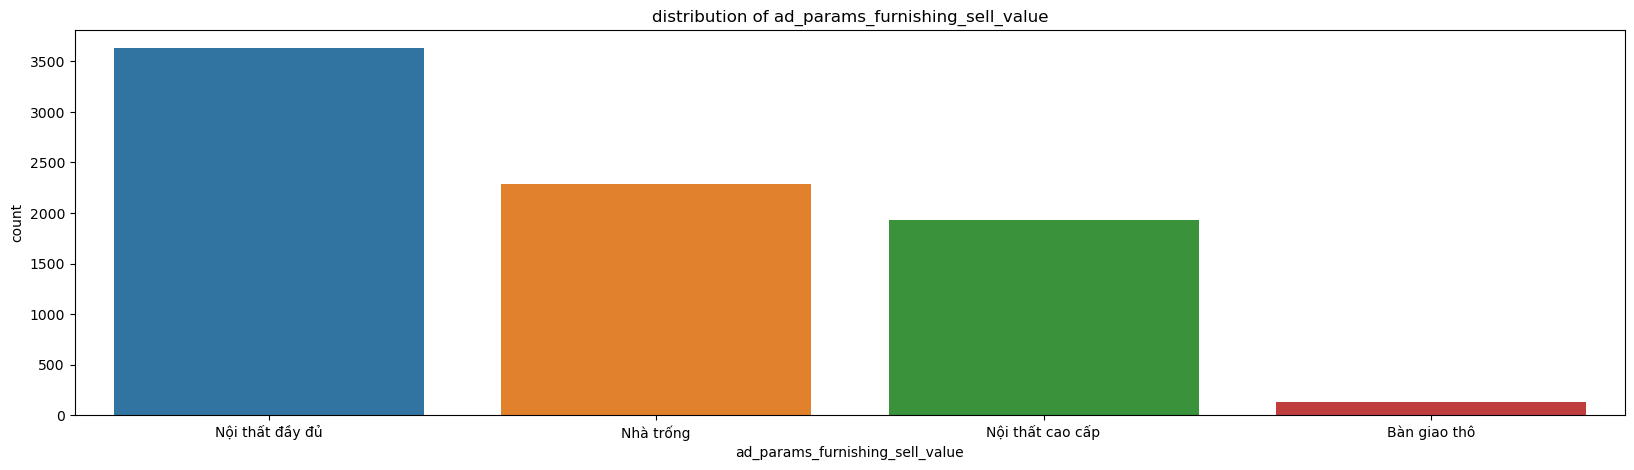

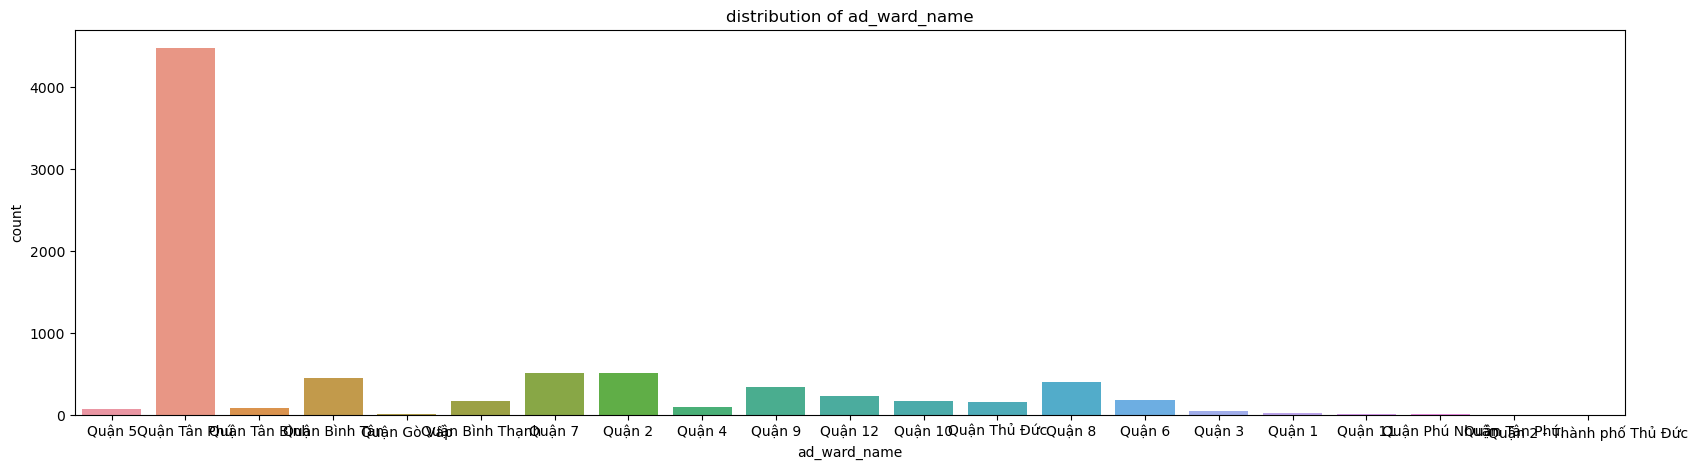

In [568]:
for col in cat_cols:
    plt.figure(figsize = (20, 5))
    sns.countplot(data = data, x = col)
    plt.title(f'distribution of {col}')
    plt.show()

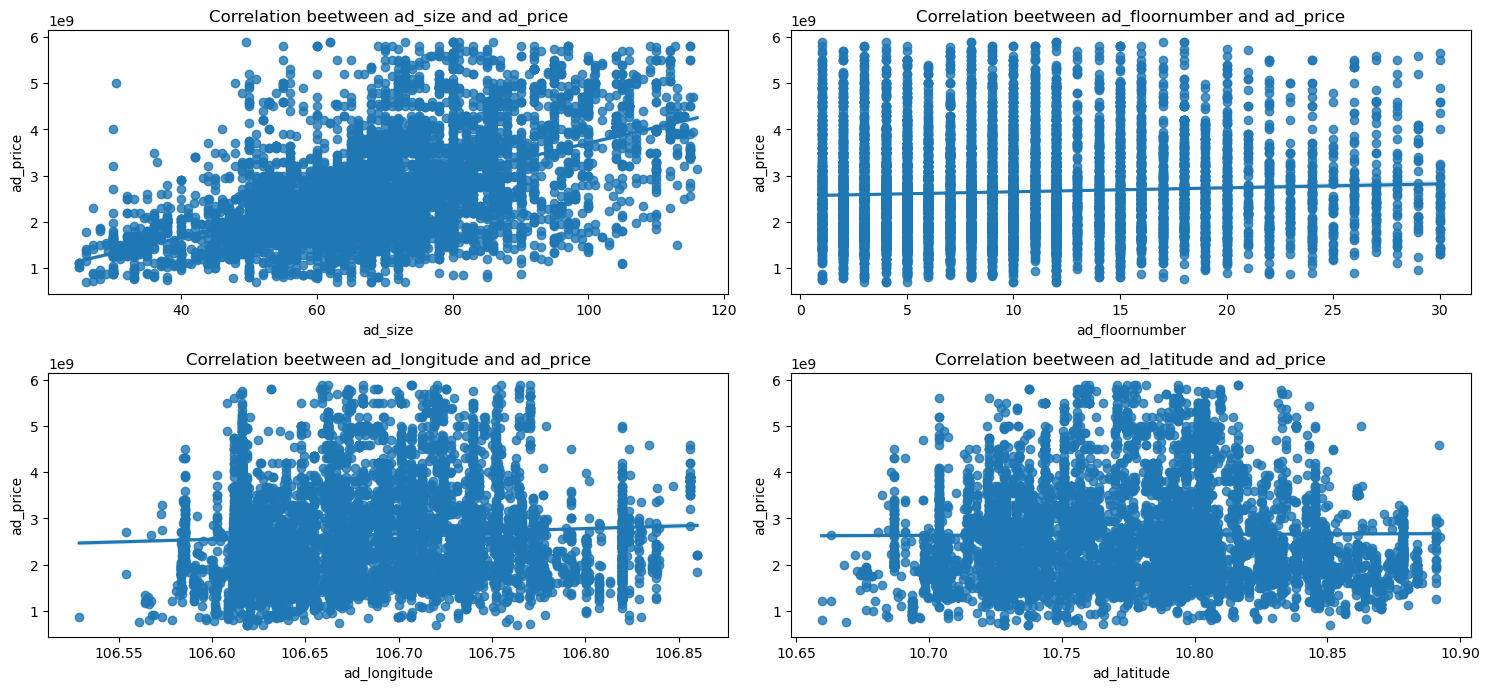

In [569]:
num_r = 3
num_c = 2

i = 0
plt.figure(figsize=(15, 10))
for col in num_cols:
    if col == 'ad_price':
        continue
    else:
        plt.subplot(num_r, num_c, i + 1)
        sns.regplot(data = data, x = col, y = 'ad_price')
        plt.title(f'Correlation beetween {col} and ad_price')
        plt.tight_layout()
    i+=1

plt.show()

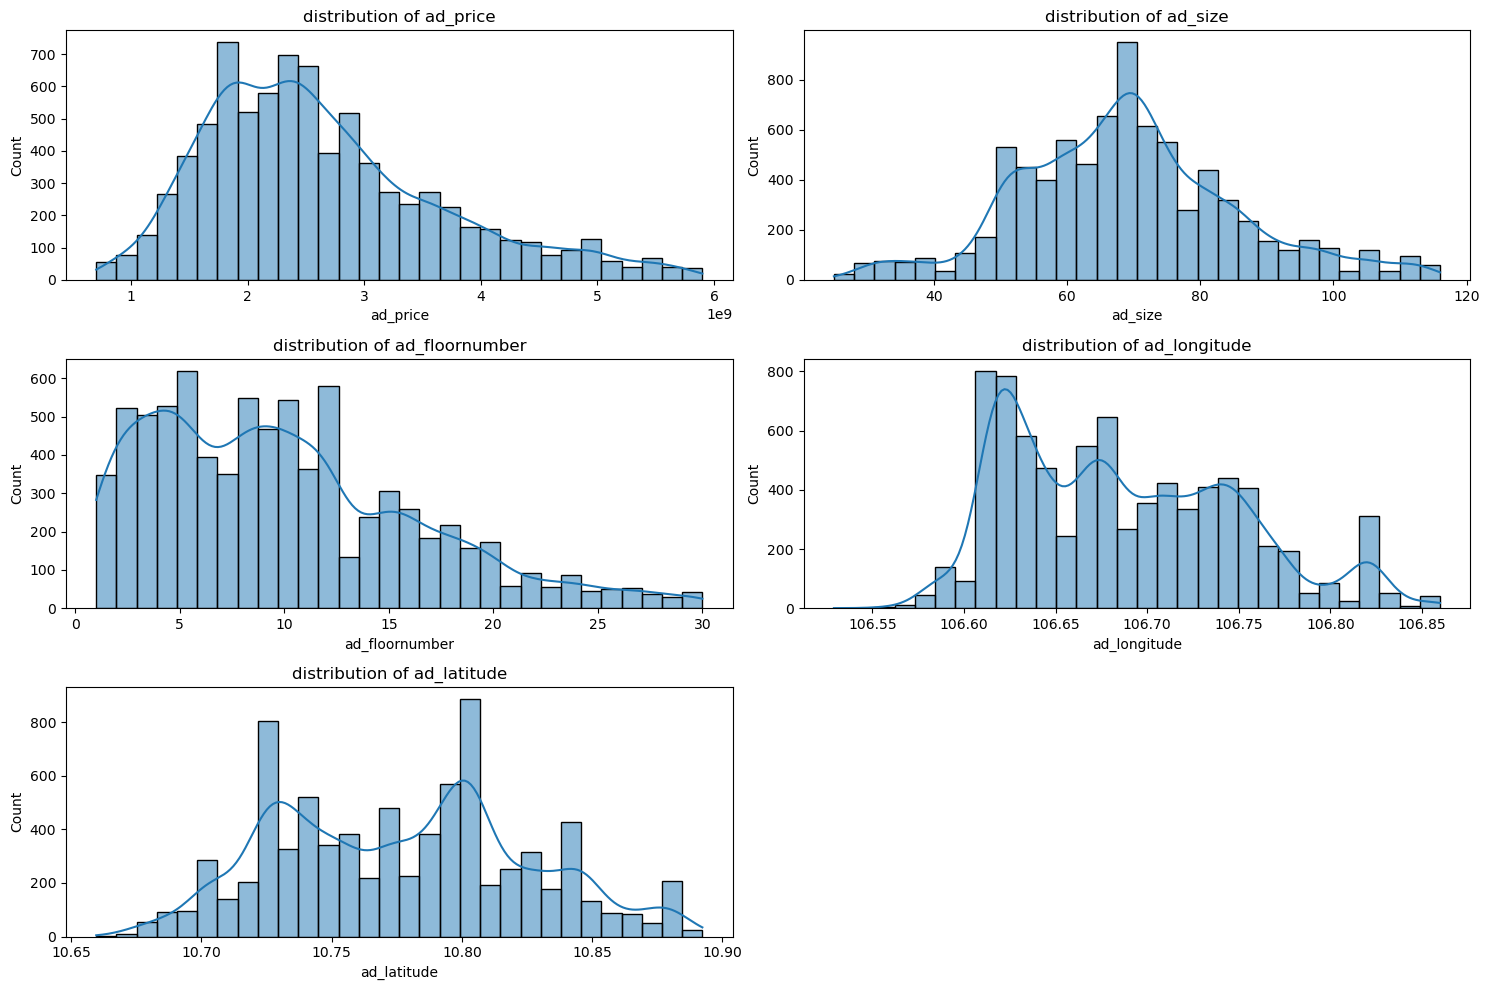

In [570]:
num_r = 3
num_c = 2

i = 0
plt.figure(figsize=(15, 10))
for col in num_cols:
    plt.subplot(num_r, num_c, i + 1)
    sns.histplot(data = data, x = col, kde=True, bins = 30)
    plt.title(f'distribution of {col}')
    plt.tight_layout()
    i+=1

plt.show()

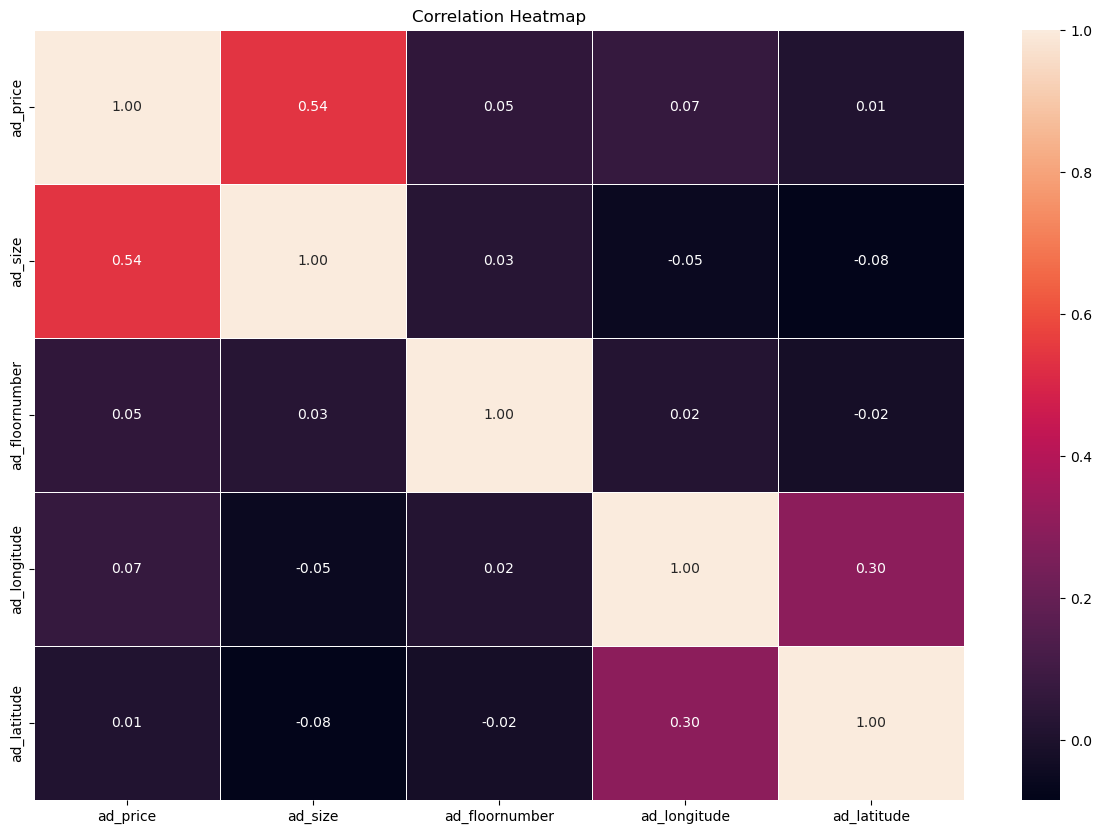

In [571]:
plt.figure(figsize=(15,10))
sns.heatmap(data.select_dtypes(include='number').corr(),annot=True, fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

# Model

## Train test split

In [572]:
# def ANOVA(data,cols, str):
#     res = {}
#     for col in cols:
#         gr_anova = data.groupby([col])
#         sample = [gr_anova.get_group(i)[str] for i in data[col].unique()]
#         f_val,p_val = stats.f_oneway(*sample)
#         res[col] = [f_val, p_val]

#     return res

In [573]:
# def KiemTraAnhHuong(df, str):
#     result = []
#     for i in num_cols:
#         if i == str:
#             continue
#         pearson_coef, p_value = stats.pearsonr(df[i], df[str])
#         if p_value < 0.05:
#             if (pearson_coef < -0.3) | (pearson_coef > 0.3):
#                 result.append(i)

#     a = ANOVA(df, cat_cols, str)
#     for key, value in a.items():
#         if value[1] < 0.05:
#             result.append(key)


#     return result

In [574]:
from sklearn.model_selection import train_test_split

In [575]:
y = data.ad_price
X = data.drop('ad_price', axis = 1)


In [576]:
X_train, X_val, y_train, y_val = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=0)

## MinMax Scaler

In [577]:
from sklearn.preprocessing import MinMaxScaler

mm_sclaer = MinMaxScaler()

num_cols = X_train.select_dtypes(exclude = 'object').columns
cat_cols = X_train.select_dtypes(include = 'object').columns
X_train[num_cols] = mm_sclaer.fit_transform(X_train[num_cols])
X_val[num_cols] = mm_sclaer.fit_transform(X_val[num_cols])

## Encoder

In [578]:
from sklearn.preprocessing import OrdinalEncoder

encoder = OrdinalEncoder()

X_train[cat_cols] = encoder.fit_transform(X_train[cat_cols])
X_val[cat_cols] = encoder.fit_transform(X_val[cat_cols])

In [579]:
X_train

,ad_rooms,ad_size,ad_floornumber,ad_longitude,ad_latitude,ad_params_apartment_feature_value,ad_params_apartment_type_value,ad_params_balconydirection_value,ad_params_direction_value,ad_params_property_status_value,ad_toilets,ad_params_property_legal_document_value,ad_params_furnishing_sell_value,ad_ward_name
5166,1.0,0.497788,0.758621,0.223269,0.251045,1.0,0.0,1.0,6.0,0.0,1.0,2.0,2.0,19.0
597,1.0,0.608407,0.310345,0.473636,0.557525,1.0,0.0,7.0,3.0,1.0,1.0,2.0,2.0,6.0
826,2.0,0.807522,0.000000,0.819448,0.575452,1.0,0.0,6.0,4.0,1.0,1.0,2.0,2.0,12.0
675,2.0,0.953540,0.344828,0.504887,0.356761,1.0,0.0,3.0,7.0,1.0,2.0,2.0,3.0,19.0
402,1.0,0.276549,0.068966,0.615413,0.361009,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,19.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4931,1.0,0.608407,0.655172,0.572738,0.416948,1.0,0.0,6.0,7.0,1.0,1.0,1.0,2.0,7.0
3264,1.0,0.387168,0.344828,0.251135,0.270652,1.0,0.0,0.0,5.0,0.0,0.0,1.0,3.0,19.0
1653,2.0,0.608407,0.310345,0.734884,0.783180,1.0,0.0,6.0,7.0,1.0,1.0,1.0,2.0,17.0
2607,1.0,0.453540,0.034483,0.280481,0.291133,1.0,0.0,6.0,4.0,0.0,1.0,2.0,3.0,19.0


In [580]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()

model.fit(X_train, y_train)

RandomForestRegressor()

In [581]:
y_pred = model.predict(X_val)

In [582]:
from sklearn.metrics import mean_squared_error, r2_score

In [583]:
mean_squared_error(y_val, y_pred)

5.4602273000838944e+17

In [584]:
model.score(X_val, y_val)

0.46753733576553425

In [590]:
data.to_csv('TPHCM-houses-data.csv')